In [1]:
# In this exercise we want to find likelihood of the top 5 most demanding job skills requested in the job posting
# for the given list of professions.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset

data = load_dataset('lukebarousse/data_jobs')
df = data['train'].to_pandas()

df = df.drop_duplicates().copy()
df['job_posted_date'] = pd.to_datetime(df.job_posted_date)

In [3]:
# These are the job professions we can search for...

In [4]:
df.job_title_short.unique()

array(['Senior Data Engineer', 'Data Analyst', 'Data Engineer',
       'Business Analyst', 'Data Scientist', 'Machine Learning Engineer',
       'Senior Data Analyst', 'Cloud Engineer', 'Senior Data Scientist',
       'Software Engineer'], dtype=object)

In [5]:
# INPUT :

In [6]:
lst = ['Data Analyst', 'Data Engineer', 'Business Analyst', 'Data Scientist']

In [7]:
# OUTPUT :

/tmp/ipykernel_17944/3834562494.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_ex = df_ex[df['job_title_short'] == job]
/tmp/ipykernel_17944/3834562494.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_ex = df_ex[df['job_title_short'] == job]
/tmp/ipykernel_17944/3834562494.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_ex = df_ex[df['job_title_short'] == job]
/tmp/ipykernel_17944/3834562494.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_ex = df_ex[df['job_title_short'] == job]


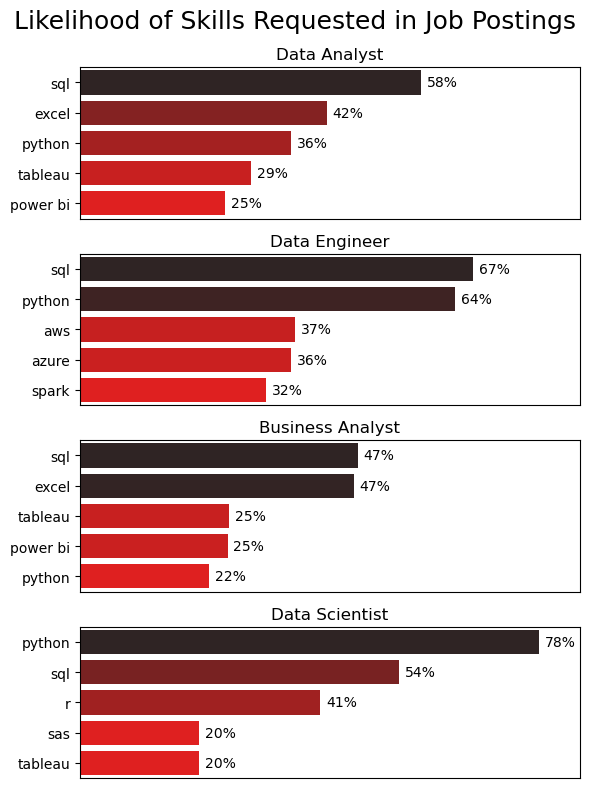

In [8]:
df.dropna(subset = "job_skills", inplace = True)

df_og = df.copy()

import ast
df['job_skills'] = df.job_skills.apply(lambda sk : ast.literal_eval(sk) if pd.notna(sk) else sk)

df_ex = df.explode("job_skills")

df_ex_og = df_ex.copy()

fig, ax = plt.subplots(len(lst),1,  figsize = (6,2*len(lst)))

for i,job in enumerate(lst) :
    df_ex = df_ex_og.copy()
    df1 = df_og.copy() 
    
    if isinstance(job, list) : 
        df_ex = df_ex[df_ex['job_title_short'].isin(job)]
        df1 = df1[df1['job_title_short'].isin(job)]
    else :
        df_ex = df_ex[df['job_title_short'] == job]
        df1 = df1[df1['job_title_short'] == job]
   
    df_plt = (df_ex.groupby(by = "job_skills")
              .agg(demand = ("job_skills", "size"))
              .sort_values(by = "demand", ascending = False)
              .reset_index()
              .head()
              )
    tot_job_post = df1.job_title_short.size
    df_plt['demand_perc'] = df_plt.demand.apply(lambda de : round(de*100/tot_job_post, 2))

    sns.barplot(data = df_plt, x = "demand_perc", y = "job_skills", hue = "demand", palette = "dark:r_r", ax=ax[i])
    ax[i].legend().remove()
    ax[i].set_title(job)
    ax[i].set_ylabel("")
    ax[i].set_xlabel("")
    ax[i].set_xlim(0,85)
    ax[i].set_xticks([])

    for j,perc in enumerate(df_plt['demand_perc']) :
        ax[i].text(x = perc + 1, y = j, s = f"{perc:.0f}%", va = "center")

fig.suptitle("Likelihood of Skills Requested in Job Postings", fontsize = 18)
fig.tight_layout()

